## 📌 Travel Product Purchase Prediction — Project Overview

## 🧩 Problem Statement
The purpose of this project is to build and compare several **Classification Models** (Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Classifier, and Bagging) to **predict whether a customer will purchase a travel package** (`ProdTaken = 1`) based on their demographic, economic, and interaction data.

---

## 📊 Dataset Information

## 🏷️ Dataset Name
Travel Agency Customer Data

## 🌐 Source
Uploaded File (`Travel.csv`)

## 🔗 URL
(Not applicable, data is local)

---

## 📐 Dataset Shape
- **Total Rows:** 4888
- **Total Columns:** 20

---

## 🔬 Data Characteristics (More Details)

| Feature | Data Type | Missing Values (Count) | Role/Description |
| :--- | :--- | :--- | :--- |
| **ProdTaken** | `int64` | 0 | **Target Label** (1=Purchased, 0=Not Purchased) |
| **CustomerID** | `int64` | 0 | Unique ID (To be dropped) |
| **Age** | `float64` | 226 | Age of customer |
| **TypeofContact** | `object` | 25 | Contact type (e.g., Self Enquiry, Company Invited) |
| **DurationOfPitch** | `float64` | 251 | Duration of the pitch (in minutes) |
| **NumberOfFollowups** | `float64` | 45 | Number of follow-ups prior to the pitch |
| **PreferredPropertyStar** | `float64` | 26 | Customer's preferred star rating |
| **NumberOfTrips** | `float64` | 140 | Number of previous trips |
| **NumberOfChildrenVisiting** | `float64` | 66 | Number of children visiting |
| **MonthlyIncome** | `float64` | 233 | Customer's monthly income |
| **Occupation** | `object` | 0 | Customer's occupation type |
| **Gender** | `object` | 0 | Customer's gender |
| **ProductPitched** | `object` | 0 | Type of product pitched (e.g., Basic, Deluxe) |
| **MaritalStatus** | `object` | 0 | Customer's marital status |
| **Designation** | `object` | 0 | Customer's job designation |
| **CityTier** | `int64` | 0 | Tier of the city |
| **Passport** | `int64` | 0 | Passport status (1=Yes, 0=No) |
| **PitchSatisfactionScore** | `int64` | 0 | Customer's satisfaction score for the pitch |
| **OwnCar** | `int64` | 0 | Owns a car (1=Yes, 0=No) |
| **NumberOfPersonVisiting**| `int64` | 0 | Number of persons visiting the destination |

---

## 🎯 Features and Target Used in This Project

## 🔹 Features (X) — 18 Total
We will use all columns except `CustomerID` and the target variable `ProdTaken`:
* **Numerical (Need Scaling)**: Age, DurationOfPitch, NumberOfFollowups, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome.
* **Categorical (Need Encoding)**: TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation.
* **Ordinal/Binary (May need no change)**: CityTier, PreferredPropertyStar, Passport, PitchSatisfactionScore, OwnCar, NumberOfPersonVisiting.

## 🎯 Target (y)
* **ProdTaken** (0 = Not Purchased, 1 = Purchased)

---

## 📚 Steps We Will Perform (Comparative Analysis)

1.  **Load the dataset** using Pandas.
2.  **Exploratory Data Analysis (EDA)** 🔍: Examine distributions, check for outliers, and visualize the target variable balance.
3.  **Data Preprocessing** 🧹:
    * **Handle Missing Values**: Apply appropriate imputation strategies (e.g., mean/median for numerical, mode for categorical) to the features with missing data.
    * **Feature Engineering/Encoding**: Apply **One-Hot Encoding** to all nominal categorical features.
    * **Feature Scaling**: Apply a **Standard Scaler** or **MinMaxScaler** to all numerical features.
    * **Drop** the `CustomerID` column.
4.  **Split the data** into training and testing sets (e.g., 70% train, 30% test).
5.  **Build and Train Multiple Classification Models** :
    * **Logistic Regression**
    * **Decision Tree (DT)**
    * **Random Forest (RF)**
    * **K-Nearest Neighbors (KNN)**
    * **Support Vector Classifier (SVC)**
    * **Bagging Classifier** (using a base estimator like DT or Logistic Regression)
6.  **Hyperparameter Tuning** ⚙️: Use techniques like **Grid Search** or **Random Search** with Cross-Validation for each model to find optimal parameters.
7.  **Evaluate Model Performance** 📈: Calculate and compare key metrics (Accuracy, Precision, Recall, F1-Score, and ROC-AUC) on the test set.
8.  **Interpret the results** and **Compare** model performance to identify the best predictor for product purchase.

# Solution

### Import the library

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report, ConfusionMatrixDisplay,RocCurveDisplay

## Now laod the dataset

In [28]:
df=pd.read_csv("Travel.csv")

In [30]:
df

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Exe

In [32]:
df.drop(columns="CustomerID",inplace=True)

In [34]:
df

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0             1  41.0     Self Enquiry         3              6.0   
1             0  49.0  Company Invited         1             14.0   
2             1  37.0     Self Enquiry         1              8.0   
3             0  33.0  Company Invited         1              9.0   
4             0   NaN     Self Enquiry         1              8.0   
...         ...   ...              ...       ...              ...   
4883          1  49.0     Self Enquiry         3              9.0   
4884          1  28.0  Company Invited         1             31.0   
4885          1  52.0     Self Enquiry         3             17.0   
4886          1  19.0     Self Enquiry         3             16.0   
4887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0  

[4888

In [36]:
for column in ["TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus", "Designation"]:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in TypeofContact: ['Self Enquiry' 'Company Invited' nan]
Unique values in Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Unique values in Gender: ['Female' 'Male' 'Fe Male']
Unique values in ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
Unique values in MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']
Unique values in Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


### Data cleaning

In [39]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

#### Impute TypeofContact: Fill the $\text{nan}$ values with the mode (most frequent value).

In [54]:
mode_contact = df['TypeofContact'].mode()[0]
df['TypeofContact'].fillna(mode_contact, inplace=True)

In [56]:
df

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0             1  41.0     Self Enquiry         3              6.0   
1             0  49.0  Company Invited         1             14.0   
2             1  37.0     Self Enquiry         1              8.0   
3             0  33.0  Company Invited         1              9.0   
4             0   NaN     Self Enquiry         1              8.0   
...         ...   ...              ...       ...              ...   
4883          1  49.0     Self Enquiry         3              9.0   
4884          1  28.0  Company Invited         1             31.0   
4885          1  52.0     Self Enquiry         3             17.0   
4886          1  19.0     Self Enquiry         3             16.0   
4887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0  

[4888

In [58]:
for column in ["TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus", "Designation"]:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in TypeofContact: ['Self Enquiry' 'Company Invited']
Unique values in Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Unique values in Gender: ['Female' 'Male']
Unique values in ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
Unique values in MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']
Unique values in Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


## Ordinal: ProductPitched, Designation → Label Encoding 
## Nominal: Occupation, Gender, MaritalStatus, TypeofContact → One-Hot Encoding

### 1. Label Encoding for ProductPitched (Ordinal)

In [62]:
product_order = {
    'Basic': 1,
    'Standard': 2,
    'Deluxe': 3,
    'Super Deluxe': 4,
    'King': 5
}

# Replace the original column with encoded values
df['ProductPitched'] = df['ProductPitched'].map(product_order)

### 2. Label Encoding for Designation (Ordinal)

In [65]:
designation_order = {
    'Executive': 1,
    'Manager': 2,
    'Senior Manager': 3,
    'AVP': 4,
    'VP': 5
}
# Replace the original column with encoded values
df['Designation'] = df['Designation'].map(designation_order)

In [67]:
print(df[['ProductPitched', 'Designation']].head())

   ProductPitched  Designation
0               3            2
1               3            2
2               1            1
3               1            1
4               1            1


###  Nominal Encoding 

In [70]:
nominal_cols = ['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True) 
print("One-Hot Encoding complete. Original nominal columns have been replaced by new binary columns.")

One-Hot Encoding complete. Original nominal columns have been replaced by new binary columns.


In [72]:
df

ProdTaken   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0             1  41.0         3              6.0                       3   
1             0  49.0         1             14.0                       3   
2             1  37.0         1              8.0                       3   
3             0  33.0         1              9.0                       2   
4             0   NaN         1              8.0                       2   
...         ...   ...       ...              ...                     ...   
4883          1  49.0         3              9.0                       3   
4884          1  28.0         1             31.0                       4   
4885          1  52.0         3             17.0                       4   
4886          1  19.0         3             16.0                       3   
4887          1  36.0         1             14.0                       4   

      NumberOfFollowups  ProductPitched  PreferredPropertyStar  NumberOfTrips  \
0                   3.0               3                    3.0            1.0   
1                   4.0               3                    4.0            2.0   
2                   4.0               1                    3.0            7.0   
3                   3.0               1                    3.0            2.0   
4                   3.0               1                    4.0            1.0   
...                 ...             ...                    ...            ...   
4883                5.0               3                    4.0            2.0   
4884                5.0               1                    3.0            3.0   
4885                4.0               2                    4.0            7.0   
4886                4.0               1                    3.0            3.0   
4887                4.0               1                    4.0            3.0   

      Passport  ...  Designation  MonthlyIncome  TypeofContact_Self Enquiry  \
0            1  ...            2        20993.0                        True   
1            0  ...            2        20130.0                       False   
2            1  ...            1        17090.0                        True   
3            1  ...            1        17909.0                       False   
4            0  ...            1        18468.0                        True   
...        ...  ...          ...            ...                         ...   
4883         1  ...            2        26576.0                        True   
4884         1  ...            1        21212.0                       False   
4885         0  ...            3        31820.0                        True   
4886         0  ...            1        20289.0                        True   
4887         1  ...            1        24041.0                        True   

      Occupation_Large Business  Occupation_Salaried  \
0                         False                 True   
1                         False                 True   
2                         False                False   
3                         False                 True   
4                         False                False   
...                         ...                  ...   
4883                      False                False   
4884                      False                 True   
4885                      False                 True   
4886                      False                False   
4887                      False                 True   

      Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
0                         False        False                  False   
1                         False         True                  False   
2                         False         True                  False   
3                         False        False                  False   
4                          True         True                  False   
...                         ...          ...                    ...   
4

### Boolean to Integer Conversion

### One-Hot Encoded columns ki list


In [76]:
nominal_encoded_cols = [
    'TypeofContact_Self Enquiry', 'Occupation_Large Business', 
    'Occupation_Salaried', 'Occupation_Small Business', 
    'Gender_Male', 'MaritalStatus_Married', 
    'MaritalStatus_Single', 'MaritalStatus_Unmarried'
]

### Replace the Nan with the 0 

In [79]:
df[nominal_encoded_cols] = df[nominal_encoded_cols].fillna(0)

### True with 1 and false with 0

In [82]:
df[nominal_encoded_cols] = df[nominal_encoded_cols].astype(int)

In [84]:
df[nominal_encoded_cols]

TypeofContact_Self Enquiry  Occupation_Large Business  \
0                              1                          0   
1                              0                          0   
2                              1                          0   
3                              0                          0   
4                              1                          0   
...                          ...                        ...   
4883                           1                          0   
4884                           0                          0   
4885                           1                          0   
4886                           1                          0   
4887                           1                          0   

      Occupation_Salaried  Occupation_Small Business  Gender_Male  \
0                       1                          0            0   
1                       1                          0            1   
2                       0                          0            1   
3                       1                          0            0   
4                       0                          1            1   
...                   ...                        ...          ...   
4883                    0                          1            1   
4884                    1                          0            1   
4885                    1                          0            0   
4886                    0                          1            1   
4887                    1                          0            1   

      MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  
0                         0                     1                        0  
1                         0                     0                        0  
2                         0                     1                        0  
3                         0                     0                        0  
4                         0                     0                        0  
...                     ...                   ...                      ...  
4883                      0                     0                        1  
4884                      0                     1                        0  
4885                      1                     0                        0  
4886                      0                     1                        0  
4887                      0                     0                        1  

[4888 rows x 8 columns]

In [86]:
df

ProdTaken   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0             1  41.0         3              6.0                       3   
1             0  49.0         1             14.0                       3   
2             1  37.0         1              8.0                       3   
3             0  33.0         1              9.0                       2   
4             0   NaN         1              8.0                       2   
...         ...   ...       ...              ...                     ...   
4883          1  49.0         3              9.0                       3   
4884          1  28.0         1             31.0                       4   
4885          1  52.0         3             17.0                       4   
4886          1  19.0         3             16.0                       3   
4887          1  36.0         1             14.0                       4   

      NumberOfFollowups  ProductPitched  PreferredPropertyStar  NumberOfTrips  \
0                   3.0               3                    3.0            1.0   
1                   4.0               3                    4.0            2.0   
2                   4.0               1                    3.0            7.0   
3                   3.0               1                    3.0            2.0   
4                   3.0               1                    4.0            1.0   
...                 ...             ...                    ...            ...   
4883                5.0               3                    4.0            2.0   
4884                5.0               1                    3.0            3.0   
4885                4.0               2                    4.0            7.0   
4886                4.0               1                    3.0            3.0   
4887                4.0               1                    4.0            3.0   

      Passport  ...  Designation  MonthlyIncome  TypeofContact_Self Enquiry  \
0            1  ...            2        20993.0                           1   
1            0  ...            2        20130.0                           0   
2            1  ...            1        17090.0                           1   
3            1  ...            1        17909.0                           0   
4            0  ...            1        18468.0                           1   
...        ...  ...          ...            ...                         ...   
4883         1  ...            2        26576.0                           1   
4884         1  ...            1        21212.0                           0   
4885         0  ...            3        31820.0                           1   
4886         0  ...            1        20289.0                           1   
4887         1  ...            1        24041.0                           1   

      Occupation_Large Business  Occupation_Salaried  \
0                             0                    1   
1                             0                    1   
2                             0                    0   
3                             0                    1   
4                             0                    0   
...                         ...                  ...   
4883                          0                    0   
4884                          0                    1   
4885                          0                    1   
4886                          0                    0   
4887                          0                    1   

      Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
0                             0            0                      0   
1                             0            1                      0   
2                             0            1                      0   
3                             0            0                      0   
4                             1            1                      0   
...                         ...          ...                    ...   
4

In [88]:
for i in df.columns:
    print(i)

ProdTaken
Age
CityTier
DurationOfPitch
NumberOfPersonVisiting
NumberOfFollowups
ProductPitched
PreferredPropertyStar
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
NumberOfChildrenVisiting
Designation
MonthlyIncome
TypeofContact_Self Enquiry
Occupation_Large Business
Occupation_Salaried
Occupation_Small Business
Gender_Male
MaritalStatus_Married
MaritalStatus_Single
MaritalStatus_Unmarried


In [90]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 16.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
df.isnull().sum()

ProdTaken                       0
Age                           226
CityTier                        0
DurationOfPitch               251
NumberOfPersonVisiting          0
NumberOfFollowups              45
ProductPitched                  0
PreferredPropertyStar          26
NumberOfTrips                 140
Passport                        0
PitchSatisfactionScore          0
OwnCar                          0
NumberOfChildrenVisiting       66
Designation                     0
MonthlyIncome                 233
TypeofContact_Self Enquiry      0
Occupation_Large Business       0
Occupation_Salaried             0
Occupation_Small Business       0
Gender_Male                     0
MaritalStatus_Married           0
MaritalStatus_Single            0
MaritalStatus_Unmarried         0
dtype: int64

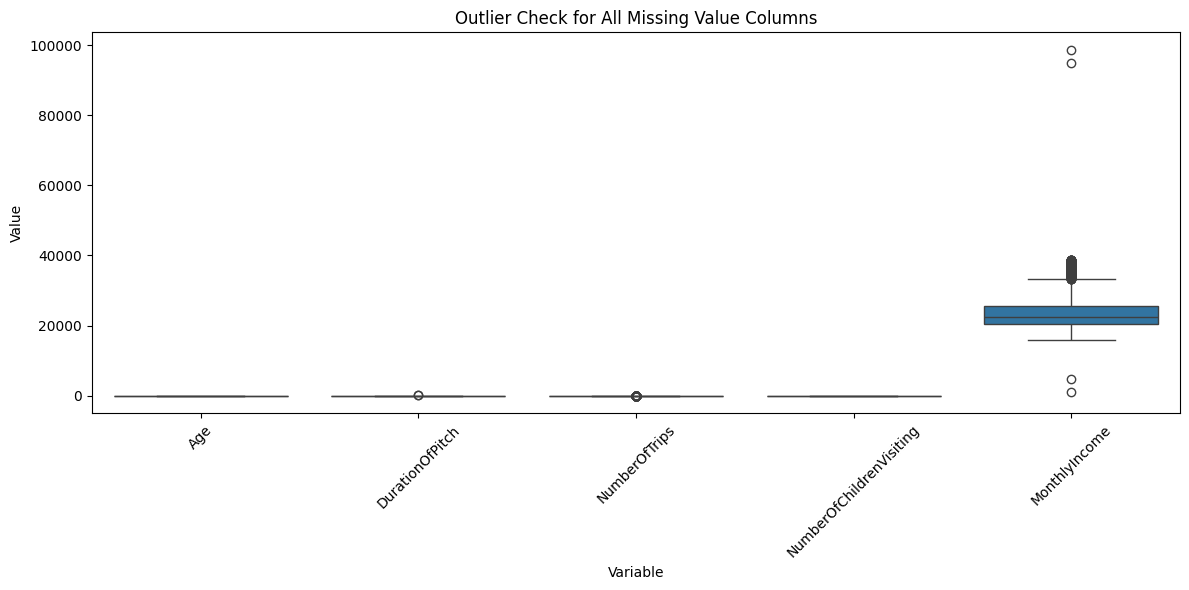

In [92]:
missing_cols_for_outlier_check = [
    'Age', 
    'DurationOfPitch', 
    'NumberOfTrips', 
    'NumberOfChildrenVisiting', 
    'MonthlyIncome'
]
plot_data = df[missing_cols_for_outlier_check].melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Variable', y='Value', data=plot_data) 
plt.title('Outlier Check for All Missing Value Columns')
plt.xticks(rotation=45) # Column names 
plt.tight_layout()
plt.show()

## Imputation

In [94]:
missing_cols_to_impute = [
    'Age', 
    'DurationOfPitch', 
    'NumberOfFollowups', 
    'PreferredPropertyStar',
    'NumberOfTrips', 
    'NumberOfChildrenVisiting', 
    'MonthlyIncome'
]
for col in missing_cols_to_impute:
    median_val = df[col].median()
    
    # Missing values (NaN) with median -> replace
    df[col] = df[col].fillna(median_val)

In [95]:
df[missing_cols_to_impute].isnull().sum()

Age                         0
DurationOfPitch             0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
NumberOfChildrenVisiting    0
MonthlyIncome               0
dtype: int64

In [96]:
df.isnull().sum()

ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch               0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
TypeofContact_Self Enquiry    0
Occupation_Large Business     0
Occupation_Salaried           0
Occupation_Small Business     0
Gender_Male                   0
MaritalStatus_Married         0
MaritalStatus_Single          0
MaritalStatus_Unmarried       0
dtype: int64

In [97]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning is done

# save the clean Data

In [100]:
df.to_csv("clean_data.csv")

# Now divide the dataset  into the label and Feature column

In [102]:
x=df.drop(columns='ProdTaken')

In [103]:
y=df.ProdTaken

In [104]:
x

Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0     41.0         3              6.0                       3   
1     49.0         1             14.0                       3   
2     37.0         1              8.0                       3   
3     33.0         1              9.0                       2   
4     36.0         1              8.0                       2   
...    ...       ...              ...                     ...   
4883  49.0         3              9.0                       3   
4884  28.0         1             31.0                       4   
4885  52.0         3             17.0                       4   
4886  19.0         3             16.0                       3   
4887  36.0         1             14.0                       4   

      NumberOfFollowups  ProductPitched  PreferredPropertyStar  NumberOfTrips  \
0                   3.0               3                    3.0            1.0   
1                   4.0               3                    4.0            2.0   
2                   4.0               1                    3.0            7.0   
3                   3.0               1                    3.0            2.0   
4                   3.0               1                    4.0            1.0   
...                 ...             ...                    ...            ...   
4883                5.0               3                    4.0            2.0   
4884                5.0               1                    3.0            3.0   
4885                4.0               2                    4.0            7.0   
4886                4.0               1                    3.0            3.0   
4887                4.0               1                    4.0            3.0   

      Passport  PitchSatisfactionScore  ...  Designation  MonthlyIncome  \
0            1                       2  ...            2        20993.0   
1            0                       3  ...            2        20130.0   
2            1                       3  ...            1        17090.0   
3            1                       5  ...            1        17909.0   
4            0                       5  ...            1        18468.0   
...        ...                     ...  ...          ...            ...   
4883         1                       1  ...            2        26576.0   
4884         1                       3  ...            1        21212.0   
4885         0                       1  ...            3        31820.0   
4886         0                       5  ...            1        20289.0   
4887         1                       3  ...            1        24041.0   

      TypeofContact_Self Enquiry  Occupation_Large Business  \
0                              1                          0   
1                              0                          0   
2                              1                          0   
3                              0                          0   
4                              1                          0   
...                          ...                        ...   
4883                           1                          0   
4884                           0                          0   
4885                           1                          0   
4886                           1                          0   
4887                           1                          0   

      Occupation_Salaried  Occupation_Small Business  Gender_Male  \
0                       1                          0            0   
1                       1                          0            1   
2                       0                          0            1   
3                       1                          0            0   
4                       0                          1            1   
...                   ...                        ...          ...   
4883                    0                          1            1   
4884                    1                  

In [105]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

# Logistic Regression

In [107]:
scaler=StandardScaler()

In [108]:
x_scaled=scaler.fit_transform(x)

### Divide the dataset into the train and test

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=500)

In [111]:
x_train.shape

(3421, 22)

In [112]:
x_test.shape

(1467, 22)

### Build the model without pass any parameter

In [114]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Check the model score

In [116]:
model.score(x_test,y_test)

0.8316291751874574

In [117]:
model.score(x_train,y_train)

0.8459514761765565

### try to find the best parameter using the GridsearchCV

In [119]:
grid_params = {
    # Regularization
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1,2,10], 
    
    # Optimization Method
    'solver': ['liblinear', 'saga'], # L1/L2 compatible solvers
    
    # Handling Imbalance
    'class_weight': [None, 'balanced'], 
    
    # Intercept term
    'fit_intercept': [True, False],
    
    # Convergence
    'max_iter': [1000] # Set a high number to ensure convergence
}

In [120]:
grid_ccp = GridSearchCV(estimator=model, param_grid=grid_params, verbose=2,cv=2, scoring='accuracy', n_jobs=-1)

In [121]:
grid_ccp.fit(x_train,y_train)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 10],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False], 'max_iter': [1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [122]:
grid_ccp.best_params_

{'C': 0.1,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'saga'}

## Based on above parameter build the Logistic Model

In [124]:
model_1=LogisticRegression(C=0.1,solver='saga',max_iter=1000)

In [125]:
model_1.fit(x_train,y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='saga')

In [126]:
model_1.score(x_test,y_test)

0.8295841854124063

In [127]:
model_1.score(x_train,y_train)

0.8471207249342297

In [128]:
y_pred =model_1.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1153   28]
 [ 222   64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      1181
           1       0.70      0.22      0.34       286

    accuracy                           0.83      1467
   macro avg       0.77      0.60      0.62      1467
weighted avg       0.81      0.83      0.79      1467



### Direct prediction with train model

In [130]:
pred_class = model_1.predict(x_test[[0]])
pred_prob = model_1.predict_proba(x_test[[0]])

print("Predicted class:", pred_class[0])
print("Probability of each class:", pred_prob[0])

Predicted class: 0
Probability of each class: [0.91175122 0.08824878]


### Confusion Matrix Plot

<Figure size 2000x2000 with 0 Axes>

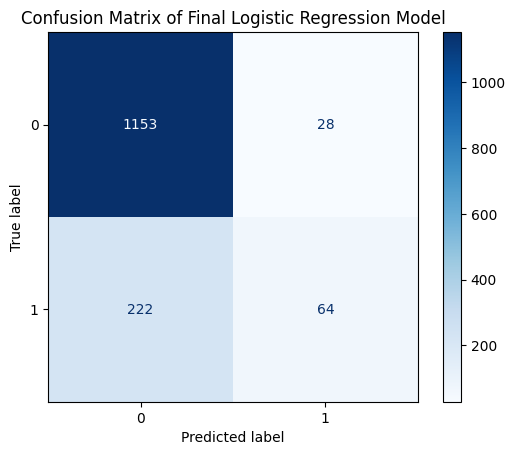

In [132]:
# 1. Prediction
y_pred =model_1.predict(x_test)

# 2. Compute the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Display the Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=model_1.classes_)
plt.figure(figsize=(20,20))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix of Final Logistic Regression Model")
plt.show()

### ROC Curve (Model Discrimination) 

<Figure size 2000x2000 with 0 Axes>

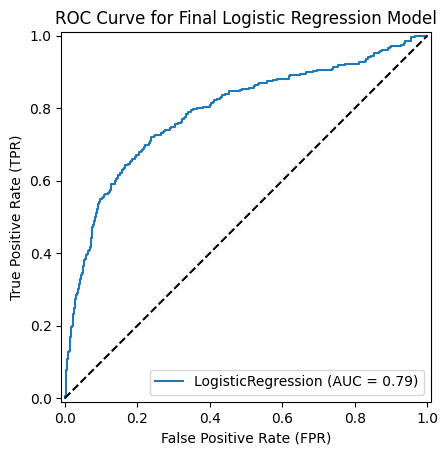

In [134]:
# 1. Use the RocCurveDisplay utility
plt.figure(figsize=(20,20))
RocCurveDisplay.from_estimator(model_1, x_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random chance line
plt.title("ROC Curve for Final Logistic Regression Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

## save the model

In [429]:
import joblib
import os 
joblib.dump(model_1,'LogisticRegression_model.pkl')
joblib.dump(scaler, "scaler.pkl") 
print("Model successfully saved")

Model successfully saved


# Now DecisionTree

In [178]:
x

Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0     41.0         3              6.0                       3   
1     49.0         1             14.0                       3   
2     37.0         1              8.0                       3   
3     33.0         1              9.0                       2   
4     36.0         1              8.0                       2   
...    ...       ...              ...                     ...   
4883  49.0         3              9.0                       3   
4884  28.0         1             31.0                       4   
4885  52.0         3             17.0                       4   
4886  19.0         3             16.0                       3   
4887  36.0         1             14.0                       4   

      NumberOfFollowups  ProductPitched  PreferredPropertyStar  NumberOfTrips  \
0                   3.0               3                    3.0            1.0   
1                   4.0               3                    4.0            2.0   
2                   4.0               1                    3.0            7.0   
3                   3.0               1                    3.0            2.0   
4                   3.0               1                    4.0            1.0   
...                 ...             ...                    ...            ...   
4883                5.0               3                    4.0            2.0   
4884                5.0               1                    3.0            3.0   
4885                4.0               2                    4.0            7.0   
4886                4.0               1                    3.0            3.0   
4887                4.0               1                    4.0            3.0   

      Passport  PitchSatisfactionScore  ...  Designation  MonthlyIncome  \
0            1                       2  ...            2        20993.0   
1            0                       3  ...            2        20130.0   
2            1                       3  ...            1        17090.0   
3            1                       5  ...            1        17909.0   
4            0                       5  ...            1        18468.0   
...        ...                     ...  ...          ...            ...   
4883         1                       1  ...            2        26576.0   
4884         1                       3  ...            1        21212.0   
4885         0                       1  ...            3        31820.0   
4886         0                       5  ...            1        20289.0   
4887         1                       3  ...            1        24041.0   

      TypeofContact_Self Enquiry  Occupation_Large Business  \
0                              1                          0   
1                              0                          0   
2                              1                          0   
3                              0                          0   
4                              1                          0   
...                          ...                        ...   
4883                           1                          0   
4884                           0                          0   
4885                           1                          0   
4886                           1                          0   
4887                           1                          0   

      Occupation_Salaried  Occupation_Small Business  Gender_Male  \
0                       1                          0            0   
1                       1                          0            1   
2                       0                          0            1   
3                       1                          0            0   
4                       0                          1            1   
...                   ...                        ...          ...   
4883                    0                          1            1   
4884                    1                  

In [180]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

### divide the dataset into train and test part

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=300)

In [185]:
x_train.shape

(3421, 22)

In [187]:
x_test.shape

(1467, 22)

## Build the DecisionTreeModel

In [190]:
dt_model=DecisionTreeClassifier()

In [192]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [194]:
test_accuracy=dt_model.score(x_test,y_test)
train_accuracy=dt_model.score(x_train,y_train)

In [196]:
print(test_accuracy)
print(train_accuracy)

0.907293796864349
1.0


## Plot the decision tree model

[Text(0.5196212582540636, 0.9761904761904762, 'x[8] <= 0.5\ngini = 0.305\nsamples = 3421\nvalue = [2779, 642]'),
 Text(0.21270483641946805, 0.9285714285714286, 'x[0] <= 21.5\ngini = 0.218\nsamples = 2412\nvalue = [2111, 301]'),
 Text(0.3661630473367658, 0.9523809523809523, 'True  '),
 Text(0.02105652013298855, 0.8809523809523809, 'x[15] <= 0.5\ngini = 0.499\nsamples = 61\nvalue = [29, 32]'),
 Text(0.01810121906169191, 0.8333333333333334, 'x[9] <= 3.5\ngini = 0.491\nsamples = 51\nvalue = [29, 22]'),
 Text(0.012190616919098634, 0.7857142857142857, 'x[0] <= 20.5\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.009235315847801994, 0.7380952380952381, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.015145917990395271, 0.7380952380952381, 'x[18] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.012190616919098634, 0.6904761904761905, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.01810121906169191, 0.6904761904761905, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 T

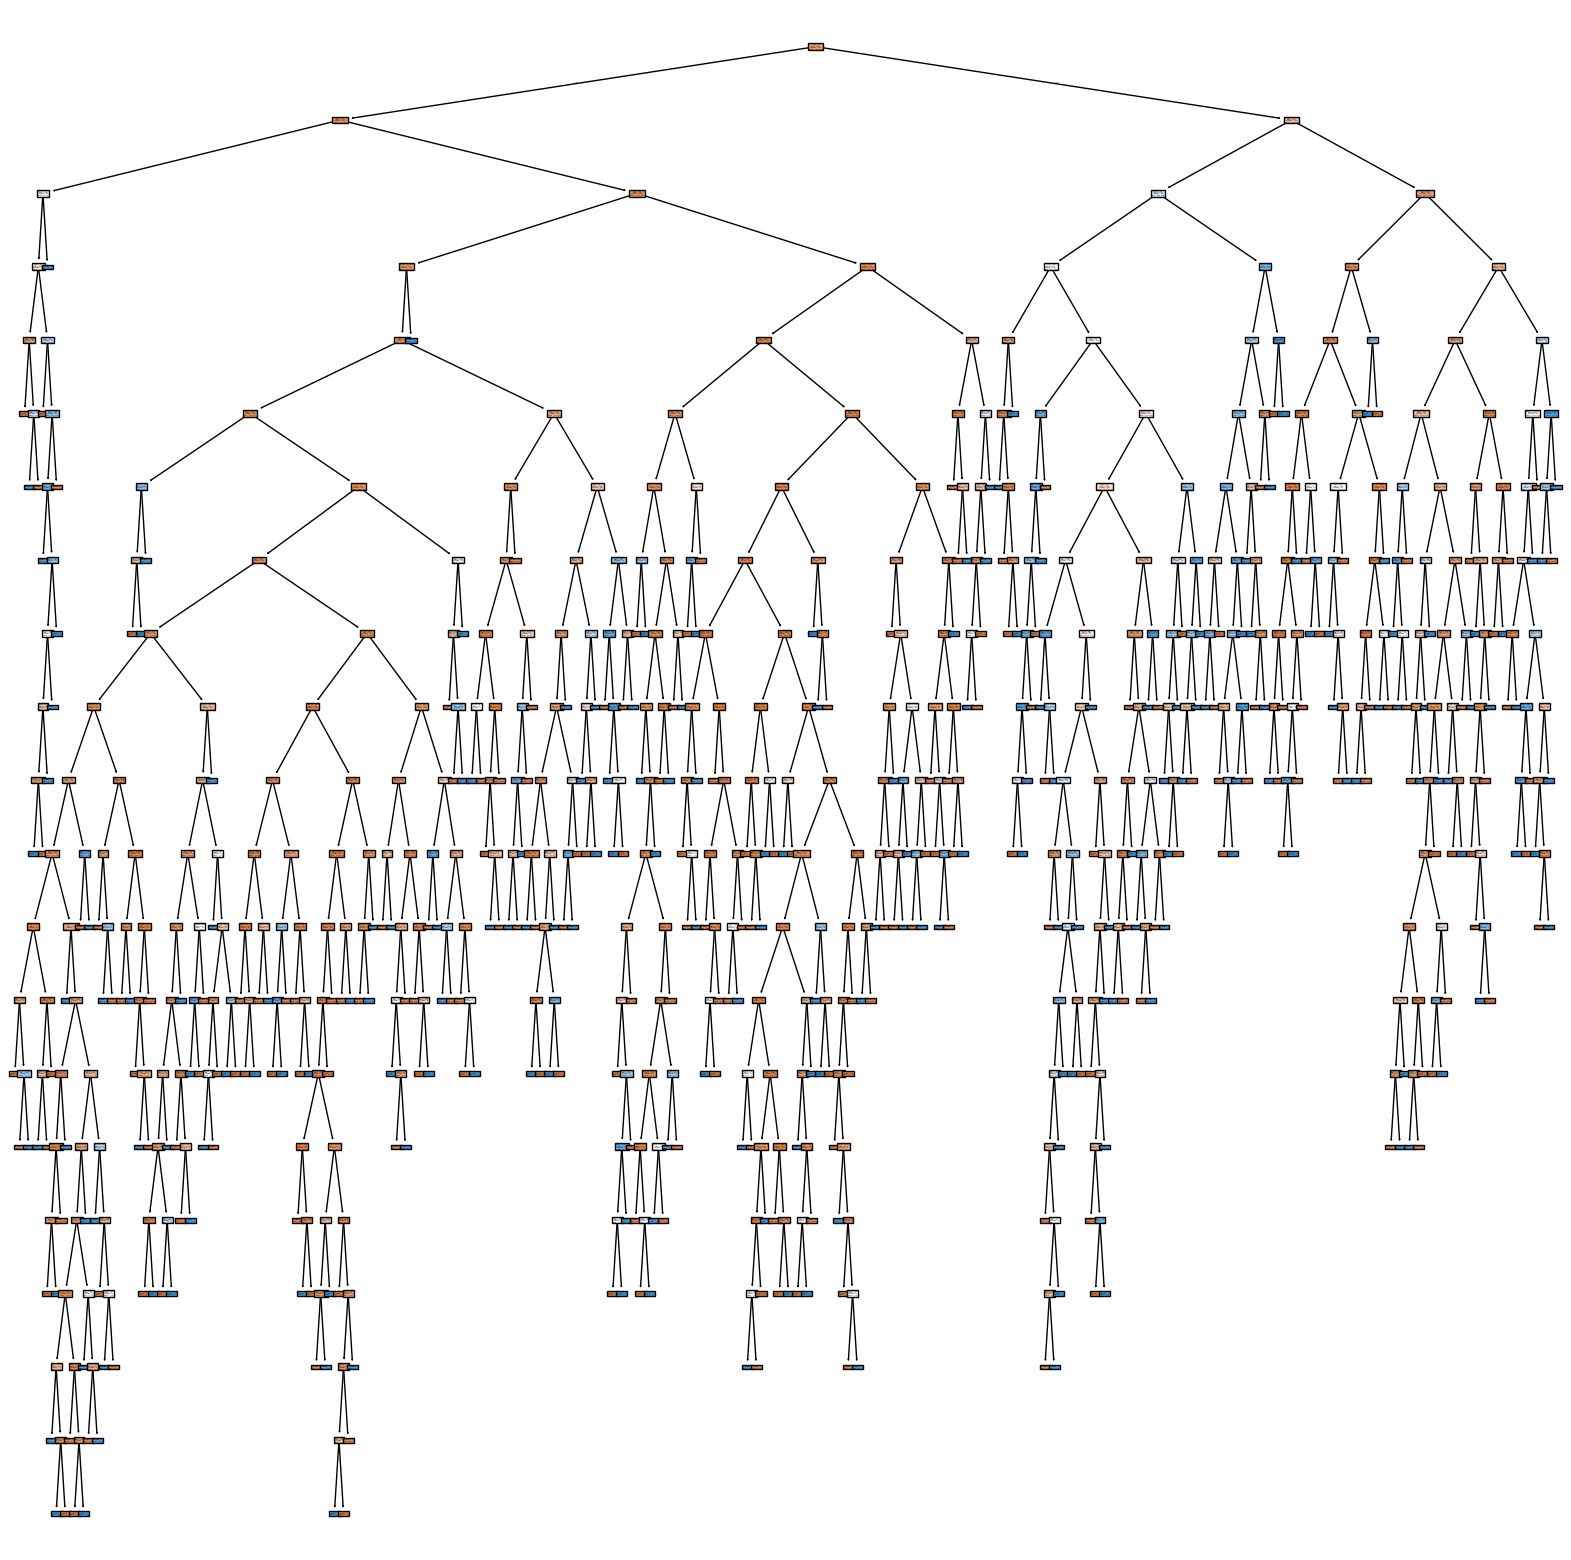

In [199]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

### Find the model best parameter using GridSearchCV

In [201]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [202]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,cv=3, scoring='accuracy', n_jobs=-1)

In [203]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [204]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Based on these parameter build again Decisiontree

In [206]:
dt_model_1=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2)

In [207]:
dt_model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [208]:
test_accuracy=dt_model_1.score(x_test,y_test)
train_accuracy=dt_model_1.score(x_train,y_train)

In [209]:
print(test_accuracy)
print(train_accuracy)

0.8813905930470347
0.980415083308974


[Text(0.6121719018932874, 0.975, 'x[8] <= 0.5\nentropy = 0.697\nsamples = 3421\nvalue = [2779, 642]'),
 Text(0.4038564974182444, 0.925, 'x[5] <= 2.5\nentropy = 0.543\nsamples = 2412\nvalue = [2111, 301]'),
 Text(0.5080141996557659, 0.95, 'True  '),
 Text(0.27269793459552494, 0.875, 'x[20] <= 0.5\nentropy = 0.666\nsamples = 1262\nvalue = [1043, 219]'),
 Text(0.17555938037865748, 0.825, 'x[13] <= 32648.0\nentropy = 0.569\nsamples = 983\nvalue = [851, 132]'),
 Text(0.1721170395869191, 0.775, 'x[6] <= 4.5\nentropy = 0.555\nsamples = 977\nvalue = [851, 126]'),
 Text(0.09832185886402754, 0.725, 'x[2] <= 15.5\nentropy = 0.481\nsamples = 779\nvalue = [698, 81]'),
 Text(0.043029259896729774, 0.675, 'x[1] <= 2.5\nentropy = 0.348\nsamples = 491\nvalue = [459.0, 32.0]'),
 Text(0.022375215146299483, 0.625, 'x[21] <= 0.5\nentropy = 0.244\nsamples = 371\nvalue = [356.0, 15.0]'),
 Text(0.0068846815834767644, 0.575, 'x[9] <= 3.5\nentropy = 0.156\nsamples = 309\nvalue = [302.0, 7.0]'),
 Text(0.003442340

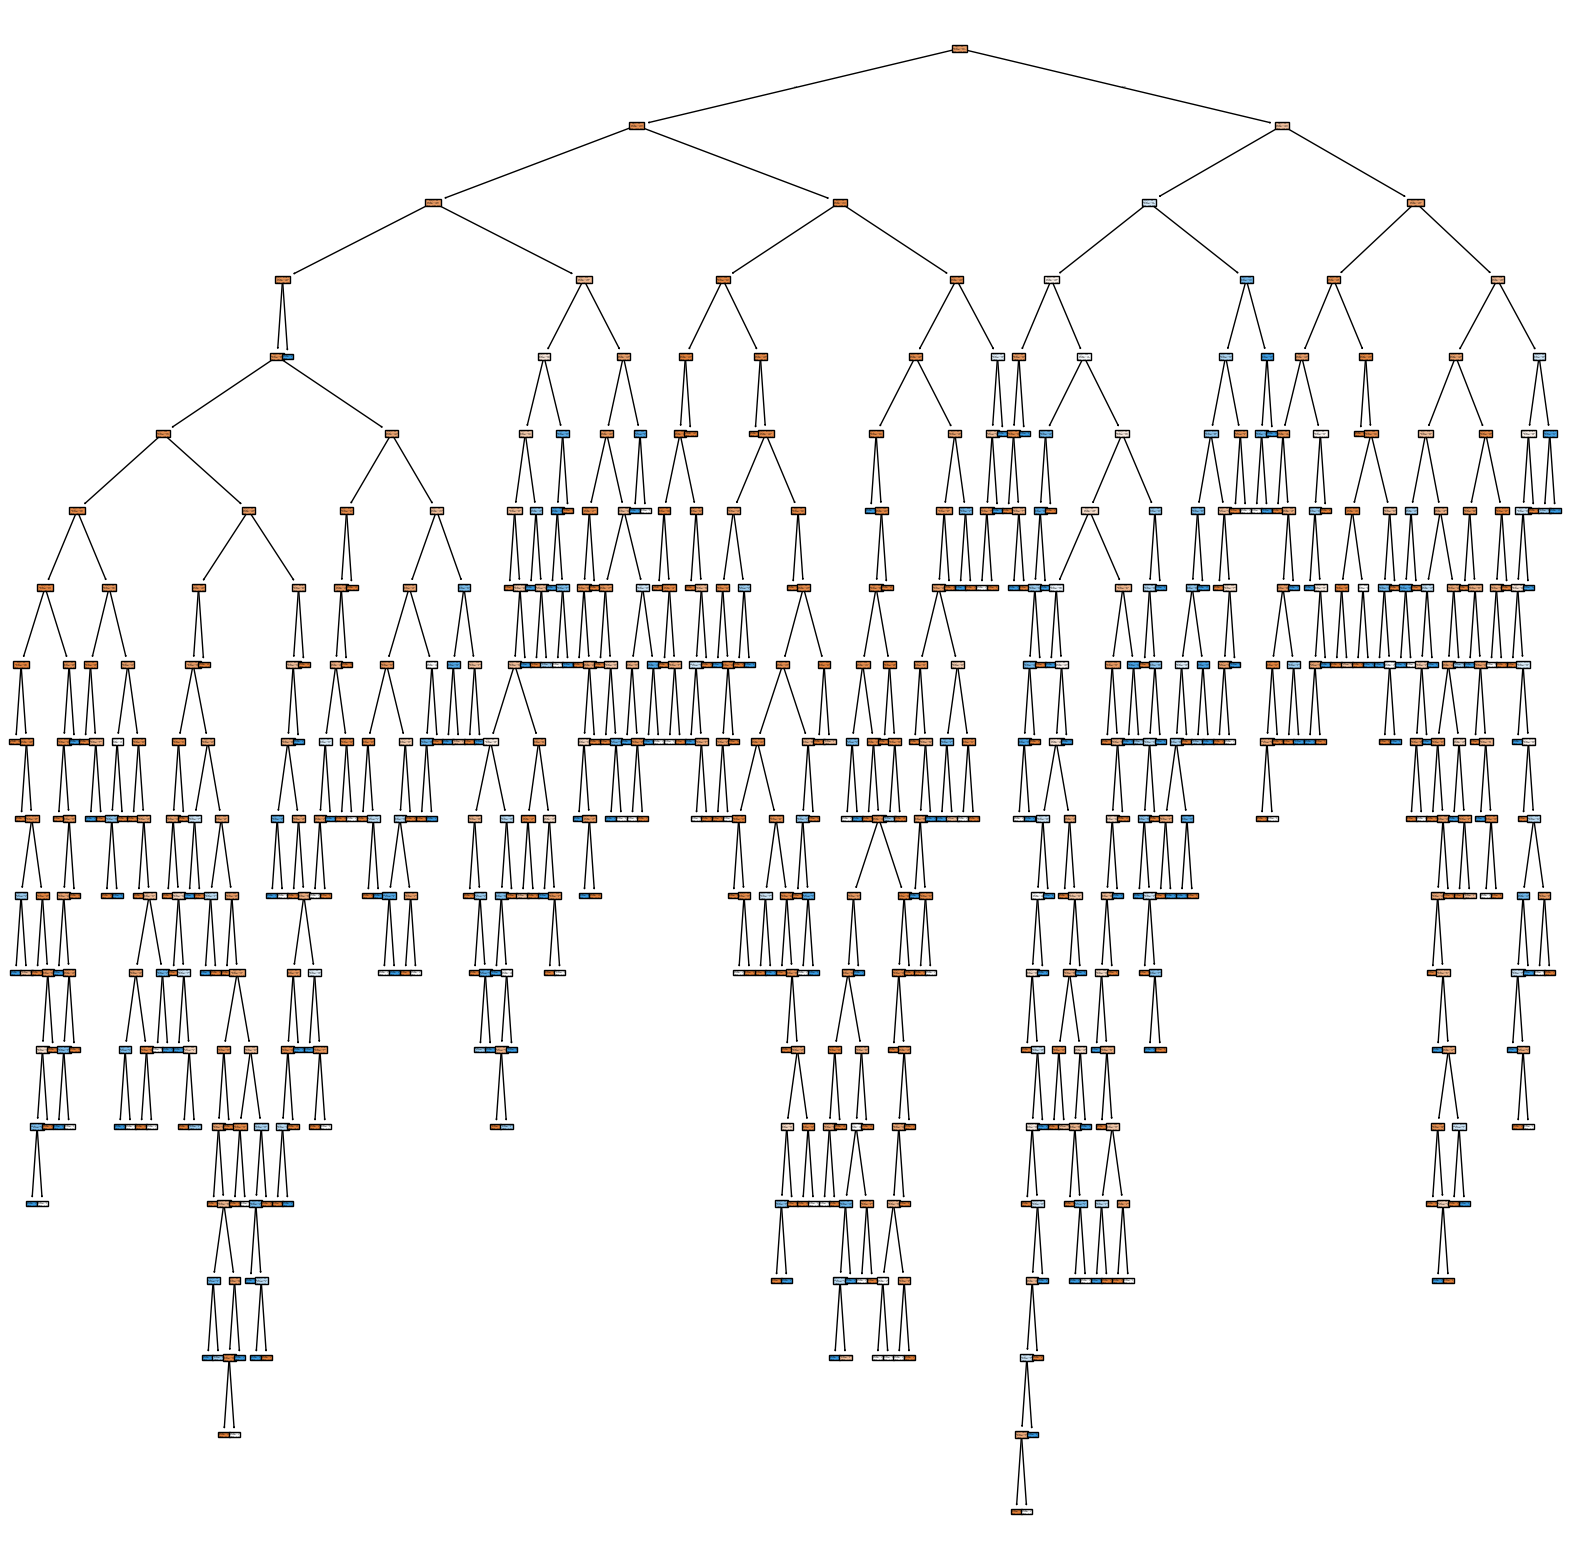

In [210]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_1,filled=True)

### some of the pruning

In [212]:
path=dt_model_1.cost_complexity_pruning_path(x_train,y_train)

In [213]:
path

{'ccp_alphas': array([0.        , 0.        , 0.00024985, 0.00036396, 0.00036396,
        0.00036396, 0.00036396, 0.00036396, 0.00036396, 0.00036396,
        0.00036396, 0.00036396, 0.00036396, 0.00036396, 0.00036396,
        0.00036396, 0.00040257, 0.00040538, 0.00046584, 0.00047052,
        0.00047052, 0.00047052, 0.00047052, 0.00047052, 0.00047052,
        0.00047052, 0.00047052, 0.00047052, 0.00055543, 0.00055543,
        0.00055543, 0.00055543, 0.00056564, 0.00057561, 0.00060534,
        0.00062605, 0.00062605, 0.00062605, 0.00068011, 0.00068036,
        0.0006865 , 0.0006865 , 0.0006865 , 0.0006865 , 0.00070355,
        0.00071393, 0.00071393, 0.00073935, 0.00073935, 0.00078631,
        0.00078631, 0.00078631, 0.00079712, 0.00079859, 0.00080529,
        0.00080529, 0.00082225, 0.00082855, 0.00084744, 0.00085058,
        0.00086694, 0.00088582, 0.00090212, 0.00092803, 0.0009346 ,
        0.00094776, 0.00096082, 0.00096474, 0.00096474, 0.00096474,
        0.00098573, 0.00099288, 0.

In [214]:
ccp_alpha=path.ccp_alphas

In [215]:
ccp_alpha

array([0.        , 0.        , 0.00024985, 0.00036396, 0.00036396,
       0.00036396, 0.00036396, 0.00036396, 0.00036396, 0.00036396,
       0.00036396, 0.00036396, 0.00036396, 0.00036396, 0.00036396,
       0.00036396, 0.00040257, 0.00040538, 0.00046584, 0.00047052,
       0.00047052, 0.00047052, 0.00047052, 0.00047052, 0.00047052,
       0.00047052, 0.00047052, 0.00047052, 0.00055543, 0.00055543,
       0.00055543, 0.00055543, 0.00056564, 0.00057561, 0.00060534,
       0.00062605, 0.00062605, 0.00062605, 0.00068011, 0.00068036,
       0.0006865 , 0.0006865 , 0.0006865 , 0.0006865 , 0.00070355,
       0.00071393, 0.00071393, 0.00073935, 0.00073935, 0.00078631,
       0.00078631, 0.00078631, 0.00079712, 0.00079859, 0.00080529,
       0.00080529, 0.00082225, 0.00082855, 0.00084744, 0.00085058,
       0.00086694, 0.00088582, 0.00090212, 0.00092803, 0.0009346 ,
       0.00094776, 0.00096082, 0.00096474, 0.00096474, 0.00096474,
       0.00098573, 0.00099288, 0.00100524, 0.00100524, 0.00101

In [216]:
dt_model_2=[]
for ccp in ccp_alpha:
    dt_m=DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train,y_train)
    dt_model_2.append(dt_m)

In [217]:
train_score=[i.score(x_train,y_train) for i in dt_model_2]
test_score=[i.score(x_test,y_test) for i in dt_model_2]

In [218]:
dt_model_2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00024985471273701924),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0003639615603146832),
 DecisionTreeClassifier(ccp_alpha=0.0004025672692971947),
 DecisionTreeClassifier(ccp_alpha=0.00040538495992774727),
 DecisionTreeCla

In [219]:
print(train_score)

[1.0, 1.0, 0.9982461268634902, 0.9836305173925752, 0.9845074539608302, 0.9845074539608302, 0.9839228295819936, 0.9845074539608302, 0.9836305173925752, 0.9842151417714119, 0.9842151417714119, 0.983338205203157, 0.9853843905290851, 0.9839228295819936, 0.9836305173925752, 0.9845074539608302, 0.9777842736042093, 0.9763227126571178, 0.9710610932475884, 0.9684302835428238, 0.9704764688687518, 0.9687225957322421, 0.9684302835428238, 0.9713534054370068, 0.9672610347851506, 0.9698918444899153, 0.9657994738380591, 0.9710610932475884, 0.9573224203449284, 0.9584916691026015, 0.9584916691026015, 0.9543992984507454, 0.9546916106401637, 0.9526454253142356, 0.9494299912306343, 0.9427068108740134, 0.9418298743057586, 0.9418298743057586, 0.9365682548962292, 0.9362759427068109, 0.935399006138556, 0.9351066939491377, 0.9351066939491377, 0.935399006138556, 0.934522069570301, 0.9342297573808828, 0.9342297573808828, 0.9318912598655364, 0.9318912598655364, 0.9231218941829874, 0.9231218941829874, 0.92312189418

In [220]:
print(test_score)

[0.9120654396728016, 0.9038854805725971, 0.9045671438309475, 0.8970688479890934, 0.8997955010224948, 0.8997955010224948, 0.8957055214723927, 0.896387184730743, 0.9004771642808452, 0.8922972051806408, 0.8957055214723927, 0.8977505112474438, 0.8991138377641446, 0.8970688479890934, 0.8957055214723927, 0.8984321745057942, 0.8997955010224948, 0.89093387866394, 0.8888888888888888, 0.8827539195637355, 0.8902522154055896, 0.8875255623721882, 0.8841172460804363, 0.8868438991138378, 0.8820722563053851, 0.8861622358554874, 0.8834355828220859, 0.8882072256305386, 0.8738922972051807, 0.8759372869802318, 0.8793456032719836, 0.8732106339468303, 0.8752556237218814, 0.874573960463531, 0.8732106339468303, 0.8698023176550784, 0.8684389911383776, 0.8670756646216768, 0.8663940013633266, 0.8643490115882754, 0.8657123381049762, 0.8643490115882754, 0.8643490115882754, 0.8643490115882754, 0.8698023176550784, 0.8677573278800272, 0.8670756646216768, 0.8643490115882754, 0.8670756646216768, 0.863667348329925, 0.86

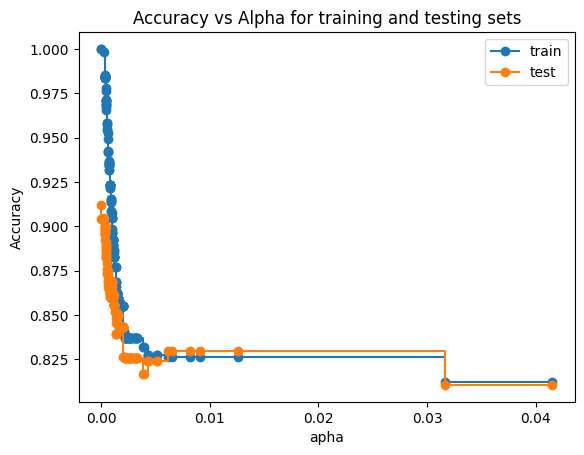

In [221]:
fig,ax=plt.subplots()
ax.set_xlabel("apha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alpha,train_score,marker='o',label="train",drawstyle='steps-post')
ax.plot(ccp_alpha,test_score,marker='o',label="test",drawstyle='steps-post')
ax.legend()
plt.show()

### Build the model

In [223]:
dt_model_ccp=DecisionTreeClassifier(random_state=0,ccp_alpha=0.01)

In [224]:
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [225]:
dt_model_ccp.score(x_test,y_test)

0.8295841854124063

In [226]:
dt_model_ccp.score(x_train,y_train)

0.8263665594855305

In [227]:
joblib.dump(dt_model_ccp,'DecisionTreeModel.pkl')

['DecisionTreeModel.pkl']

[Text(0.4, 0.8333333333333334, 'x[8] <= 0.5\ngini = 0.305\nsamples = 3421\nvalue = [2779, 642]'),
 Text(0.2, 0.5, 'gini = 0.218\nsamples = 2412\nvalue = [2111, 301]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[12] <= 1.5\ngini = 0.447\nsamples = 1009\nvalue = [668, 341]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.493\nsamples = 408\nvalue = [180, 228]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.305\nsamples = 601\nvalue = [488.0, 113.0]')]

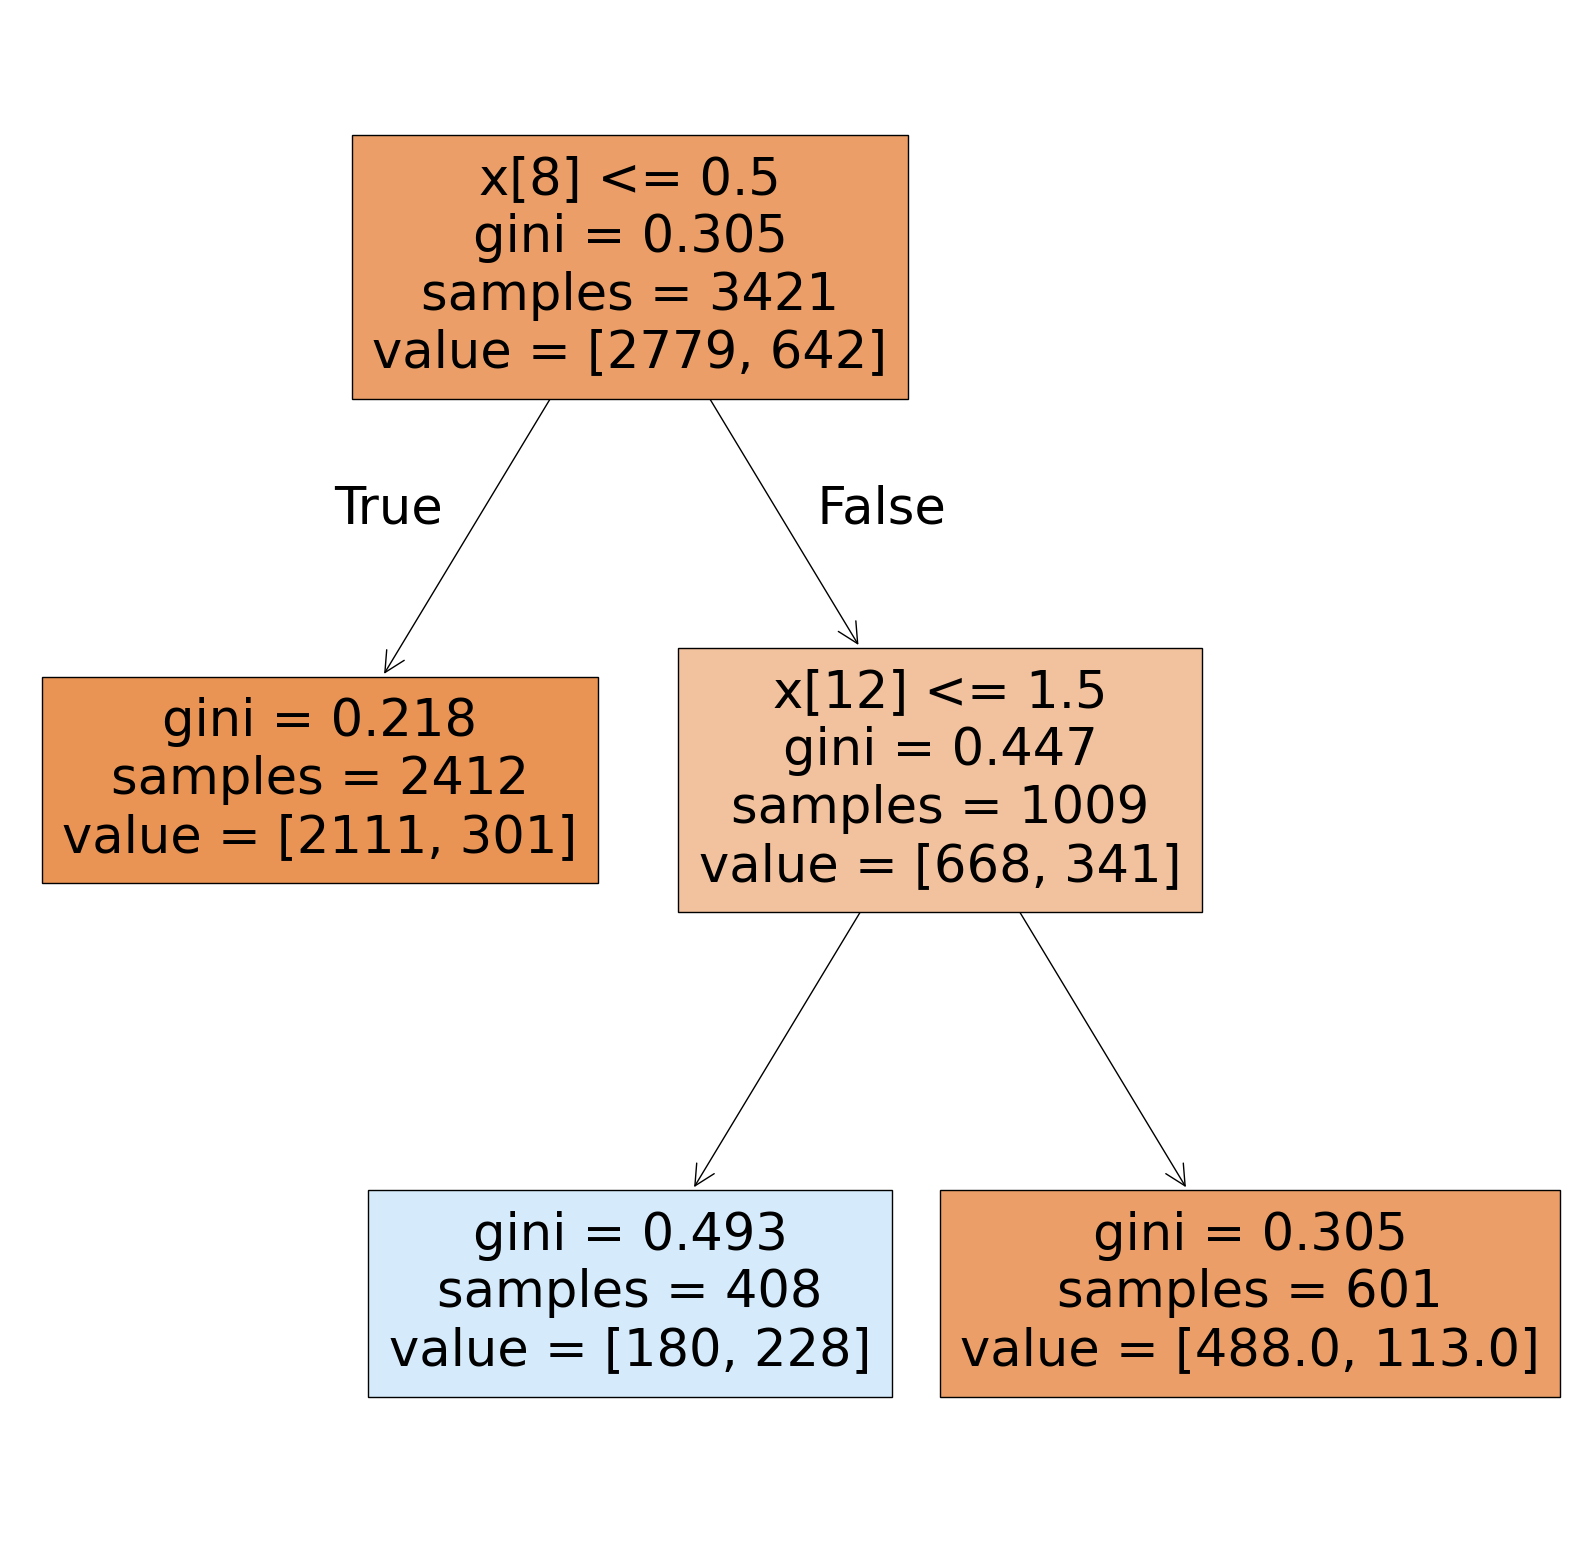

In [228]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [229]:
y_pred =dt_model_ccp.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8295841854124063
[[1123   66]
 [ 184   94]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1189
           1       0.59      0.34      0.43       278

    accuracy                           0.83      1467
   macro avg       0.72      0.64      0.66      1467
weighted avg       0.81      0.83      0.81      1467



In [230]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': dt_model_ccp.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                       Feature  Importance
12                 Designation    0.508278
8                     Passport    0.491722
0                          Age    0.000000
20        MaritalStatus_Single    0.000000
19       MaritalStatus_Married    0.000000
18                 Gender_Male    0.000000
17   Occupation_Small Business    0.000000
16         Occupation_Salaried    0.000000
15   Occupation_Large Business    0.000000
14  TypeofContact_Self Enquiry    0.000000
13               MonthlyIncome    0.000000
11    NumberOfChildrenVisiting    0.000000
1                     CityTier    0.000000
10                      OwnCar    0.000000
9       PitchSatisfactionScore    0.000000
7                NumberOfTrips    0.000000
6        PreferredPropertyStar    0.000000
5               ProductPitched    0.000000
4            NumberOfFollowups    0.000000
3       NumberOfPersonVisiting    0.000000
2              DurationOfPitch    0.000000
21     MaritalStatus_Unmarried    0.000000


# BaggingClassifier Model For DecisionTree

In [265]:
bag_dt=BaggingClassifier(DecisionTreeClassifier())

In [267]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [271]:
bag_dt.score(x_test,y_test)

0.9154737559645535

In [273]:
bag_dt.score(x_train,y_train)

0.9929845074539608

In [275]:
bag_dt.classes_

array([0, 1], dtype=int64)

In [300]:
grid_pram={
    "n_estimators":[5,10,15],
    "max_samples":[0.5,1.0,3]
}

In [302]:
bag_dt_1=GridSearchCV(bag_dt,param_grid=grid_pram,verbose=2,cv=2,n_jobs=-1)

In [304]:
bag_dt_1.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'max_samples': [0.5, 1.0, 3],
                         'n_estimators': [5, 10, 15]},
             verbose=2)

In [306]:
bag_dt_1.score(x_train,y_train)

0.9982461268634902

In [308]:
bag_dt_1.score(x_test,y_test)

0.9243353783231084

## save the model

In [328]:
joblib.dump(bag_dt_1,"Bagging_DecisionTree_model.pkl")

['Bagging_DecisionTree_model.pkl']

# RandomForest Model

In [331]:
rmf_model=RandomForestClassifier()

In [333]:
rmf_model.fit(x_train,y_train)

RandomForestClassifier()

In [335]:
rmf_model.score(x_test,y_test)

0.9100204498977505

In [337]:
rmf_model.score(x_train,y_train)

1.0

#### model is overfit

In [353]:
param_grid_fast = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 0.5],
    'max_depth': [15, 30, None],  
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


In [355]:
grid_rmf=GridSearchCV(estimator=rmf_model,param_grid=param,cv=2,verbose=1,n_jobs=-1)

In [357]:
grid_rmf.fit(x_train,y_train)

Fitting 2 folds for each of 648 candidates, totalling 1296 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 0.5, 0.75],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

#### based on above parameter build the Randomforest model

In [361]:
rfm_final=RandomForestClassifier(n_estimators=200,max_features=0.75)

In [363]:
rfm_final.fit(x_train,y_train)

RandomForestClassifier(max_features=0.75, n_estimators=200)

In [367]:
rfm_final.score(x_test,y_test)

0.9325153374233128

In [369]:
rfm_final.score(x_train,y_train)

1.0

In [424]:
joblib.dump(rfm_final,"RandomForestModel.pkl")

['RandomForestModel.pkl']

# K-Nearest-Neighbor¶

In [375]:
knn=KNeighborsClassifier()

In [377]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [379]:
knn.score(x_test,y_test)

0.7811860940695297

In [381]:
knn.score(x_train,y_train)

0.8392282958199357

In [383]:
pram={
    "n_neighbors" :[3,5,7,9,11,13,17,21,23,25],
    "weights" :['uniform', 'distance'],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size" :[10,15,20,25,30,35,40,45,50],
    "p":[1,2]
}

In [385]:
grid_cv=GridSearchCV(knn,param_grid=pram)

In [387]:
grid_cv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 17, 21, 23, 25],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

### based on above parameter build the Knn model

In [391]:
knn_model=KNeighborsClassifier(n_neighbors=13,weights='distance',algorithm='kd_tree',leaf_size=15,p=1)

In [393]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=13, p=1,
                     weights='distance')

In [397]:
test_score=knn_model.score(x_test,y_test)
train_score=knn_model.score(x_train,y_train)

In [399]:
test_score

0.8882072256305386

In [401]:
train_score

1.0

In [403]:
y_pred = knn_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8882072256305386
[[1175   14]
 [ 150  128]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1189
           1       0.90      0.46      0.61       278

    accuracy                           0.89      1467
   macro avg       0.89      0.72      0.77      1467
weighted avg       0.89      0.89      0.87      1467



In [405]:
joblib.dump(knn_model, "knn_model.pkl")

['knn_model.pkl']

# Support vector machine

In [414]:
svc=SVC()

In [416]:
svc.fit(x_train,y_train)

SVC()

In [418]:
svc.score(x_test,y_test)

0.8104976141785958

In [420]:
svc.score(x_train,y_train)

0.8123355743934522

In [422]:
joblib.dump(svc,"SVC.pkl")

['SVC.pkl']

# completed